In [13]:
import numpy as np
import matplotlib.pyplot as plt
import time

from collections import Counter
from scipy.spatial import Delaunay
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Task 1

## 1(a)

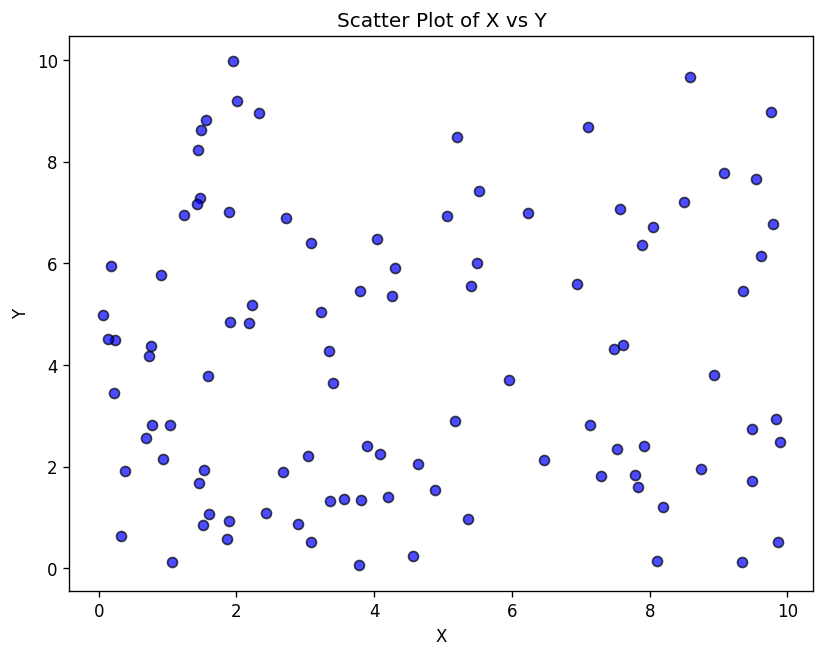

In [2]:
# Load the data, skipping the first row
file_path = "mesh.dat"  # Replace with the actual path to your .dat file
data = np.loadtxt(file_path, skiprows=1)

# Extract X and Y columns
x = data[:, 0]
y = data[:, 1]

# Create a scatter plot
plt.figure(figsize=(8, 6),dpi=120)
plt.scatter(x, y, color='blue', alpha=0.7, edgecolor='k', label='Data points')
plt.title("Scatter Plot of X vs Y")
plt.xlabel("X")
plt.ylabel("Y")
#plt.legend()
plt.grid(0)
plt.show()

# 1(b) Four Algorithms 

In [3]:
# Start with a point that has the lowest y coordinate
min_y_index = np.argmin(y)
min_x = x[min_y_index]
min_y = y[min_y_index]
print(min_x,min_y)


3.774648 0.053429


In [4]:


# 1. Graham Scan
def graham_scan(x, y):
    points = np.column_stack((x, y))

    def orientation(p, q, r):
        return (q[1] - p[1]) * (r[0] - q[0]) - (q[0] - p[0]) * (r[1] - q[1])

    points = sorted(points, key=lambda p: (p[0], p[1]))
    lower, upper = [], []

    for p in points:
        while len(lower) >= 2 and orientation(lower[-2], lower[-1], p) <= 0:
            lower.pop()
        lower.append(p)

    for p in reversed(points):
        while len(upper) >= 2 and orientation(upper[-2], upper[-1], p) <= 0:
            upper.pop()
        upper.append(p)

    return np.array(lower[:-1] + upper[:-1])

# 2. Jarvis March
def jarvis_march(x, y):
    points = np.column_stack((x, y))
    n = len(points)
    if n < 3:
        return points

    hull = []
    start = np.argmin(points[:, 0])
    point_on_hull = start

    while True:
        hull.append(points[point_on_hull])
        endpoint = (point_on_hull + 1) % n

        for i in range(n):
            if np.cross(points[endpoint] - points[point_on_hull], points[i] - points[point_on_hull]) < 0:
                endpoint = i

        point_on_hull = endpoint
        if point_on_hull == start:
            break

    return np.array(hull)

# 3. Quickhull
def quickhull(x, y):
    points = np.column_stack((x, y))

    def find_hull(points, p1, p2):
        if len(points) == 0:
            return []
        farthest_point = points[np.argmax(np.cross(p2 - p1, points - p1))]
        left_of_line1 = points[np.cross(farthest_point - p1, points - p1) > 0]
        left_of_line2 = points[np.cross(p2 - farthest_point, points - farthest_point) > 0]
        return find_hull(left_of_line1, p1, farthest_point) + [farthest_point] + find_hull(left_of_line2, farthest_point, p2)

    points = np.array(sorted(points, key=lambda p: p[0]))
    p1, p2 = points[0], points[-1]
    left_of_line = points[np.cross(p2 - p1, points - p1) > 0]
    right_of_line = points[np.cross(p1 - p2, points - p2) > 0]
    return np.array([p1] + find_hull(left_of_line, p1, p2) + [p2] + find_hull(right_of_line, p2, p1))

# 4. Monotone Chain
def monotone_chain(x, y):
    points = np.column_stack((x, y))
    points = sorted(points, key=lambda p: (p[0], p[1]))
    lower, upper = [], []

    for p in points:
        while len(lower) >= 2 and np.cross(lower[-1] - lower[-2], p - lower[-1]) <= 0:
            lower.pop()
        lower.append(p)

    for p in reversed(points):
        while len(upper) >= 2 and np.cross(upper[-1] - upper[-2], p - upper[-1]) <= 0:
            upper.pop()
        upper.append(p)

    return np.array(lower[:-1] + upper[:-1])



# 1(c)

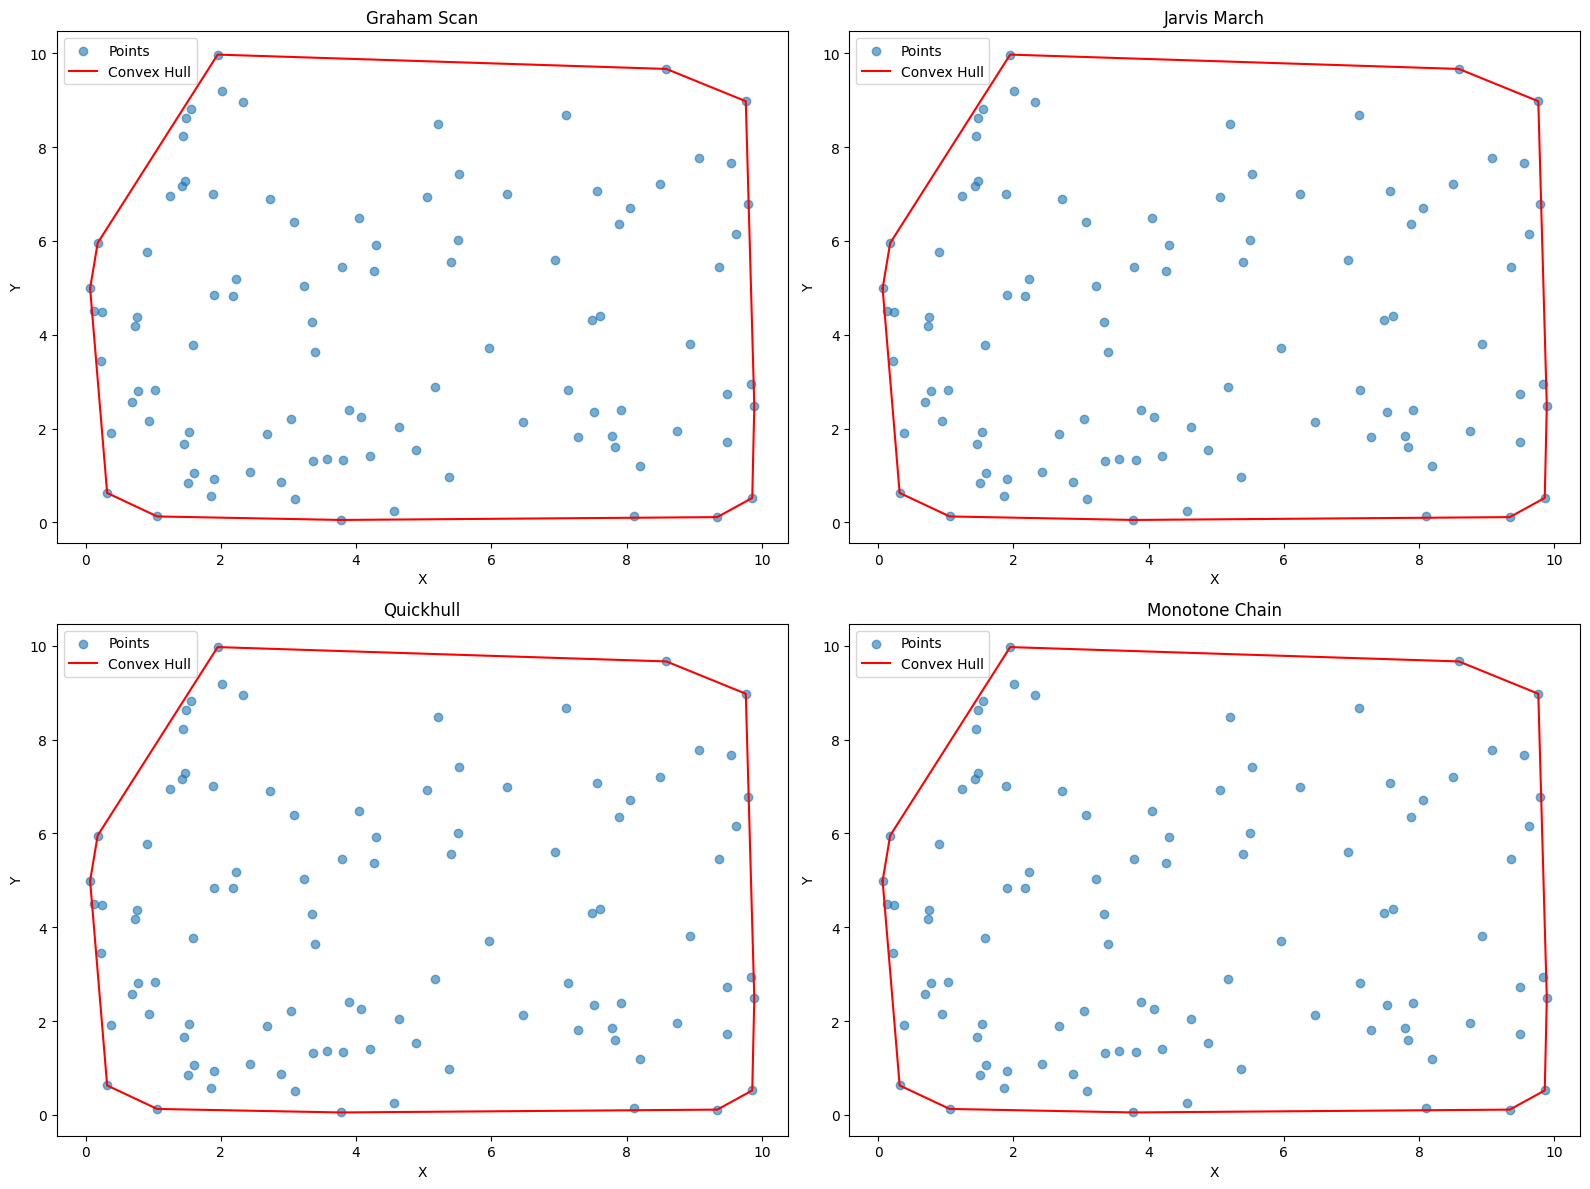

In [5]:
# Compute convex hulls using each method
graham_hull = graham_scan(x, y)
jarvis_hull = jarvis_march(x, y)
quick_hull = quickhull(x, y)
monotone_hull = monotone_chain(x, y)

# Plot the results
plt.figure(figsize=(16, 12))

methods = [
    ("Graham Scan", graham_hull),
    ("Jarvis March", jarvis_hull),
    ("Quickhull", quick_hull),
    ("Monotone Chain", monotone_hull),
]

for i, (name, hull) in enumerate(methods, 1):
    plt.subplot(2, 2, i)
    plt.scatter(x, y, label="Points", alpha=0.6)
    hull = np.vstack((hull, hull[0]))  # Close the loop
    plt.plot(hull[:, 0], hull[:, 1], color="red", label="Convex Hull")
    plt.title(name)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend()
    plt.grid(0)
plt.tight_layout()
plt.show()


# 2(a) and (b)

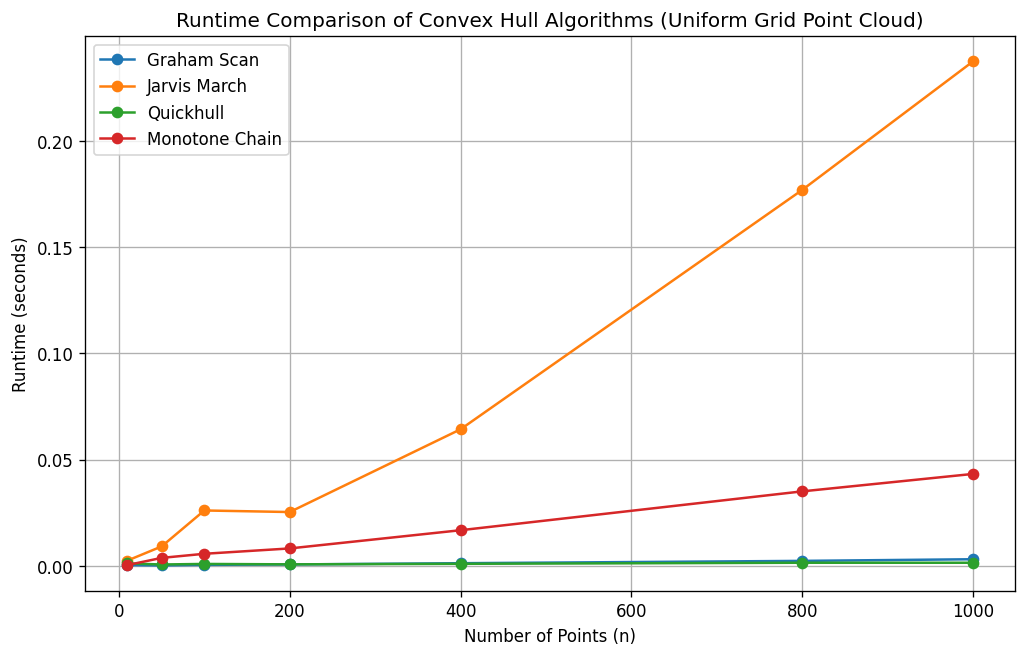

In [ ]:

def generate_uniform_grid(n):
    x = np.random.rand(n)  # Random x-coordinates in [0, 1]
    y = np.random.rand(n)  # Random y-coordinates in [0, 1]
    return x, y

def measure_runtime(x, y, func):
    start_time = time.time()
    func(x, y)
    return time.time() - start_time

n_values = [10, 50, 100, 200, 400, 800, 1000]

results = {"Graham Scan": [], "Jarvis March": [], "Quickhull": [], "Monotone Chain": []}

for n in n_values:
    x, y = generate_uniform_grid(n)
    results["Graham Scan"].append(measure_runtime(x, y, graham_scan))
    results["Jarvis March"].append(measure_runtime(x, y, jarvis_march))
    results["Quickhull"].append(measure_runtime(x, y, quickhull))
    results["Monotone Chain"].append(measure_runtime(x, y, monotone_chain))

plt.figure(figsize=(10, 6),dpi=120)
for method, times in results.items():
    plt.plot(n_values, times, label=method, marker='o')

plt.xlabel("Number of Points (n)")
plt.ylabel("Runtime (seconds)")
plt.title("Runtime Comparison of Convex Hull Algorithms (Uniform Grid Point Cloud)")
plt.legend()
plt.grid(True)
plt.show()

# Graham O(nlogn)
# Jarvis March O（nh)
# QuickHull: Kind of luck dependent varying from O(nlogn) to O(n^2)
# Monotone Chain: O(nlogn)


# 2(c and d)

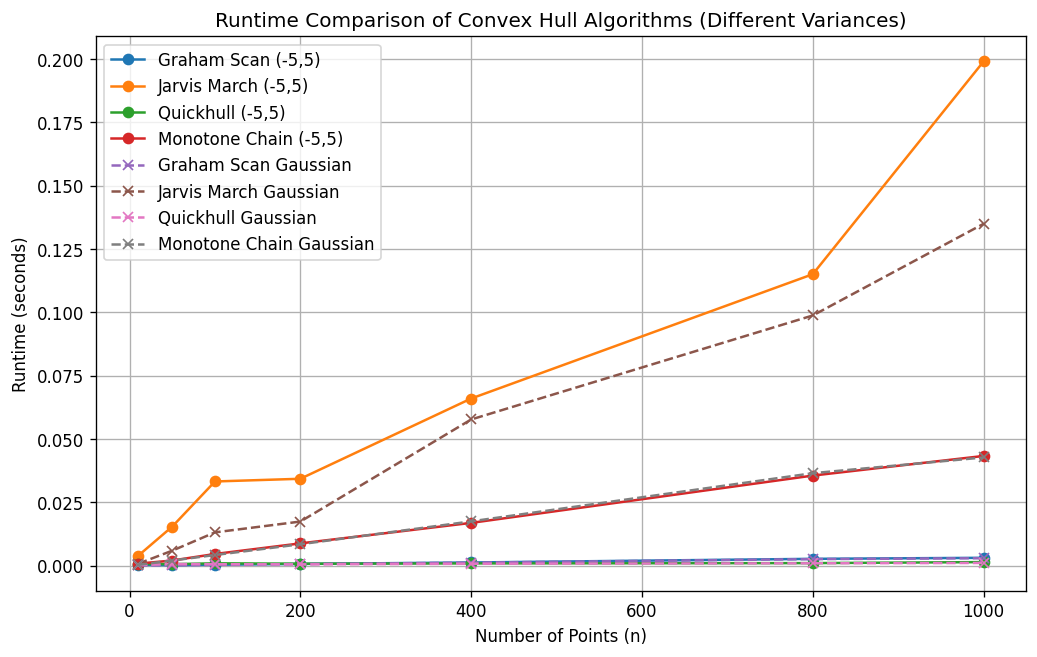

In [9]:
def generate_point_cloud(n, distribution="uniform", bounds=(0, 1), variance=1):
    if distribution == "uniform":
        x = np.random.uniform(bounds[0], bounds[1], n)
        y = np.random.uniform(bounds[0], bounds[1], n)
    elif distribution == "gaussian":
        x = np.random.normal(0, np.sqrt(variance), n)
        y = np.random.normal(0, np.sqrt(variance), n)
    return x, y

# Measure runtime
def measure_runtime(x, y, func):
    start_time = time.time()
    func(x, y)  # Call the convex hull function
    return time.time() - start_time


def analyze_runtime(distribution, bounds=None, variance=1):
    n_values = [10, 50, 100, 200, 400, 800, 1000]
    results = {"Graham Scan": [], "Jarvis March": [], "Quickhull": [], "Monotone Chain": []}

    for n in n_values:
        x, y = generate_point_cloud(n, distribution=distribution, bounds=bounds, variance=variance)
        results["Graham Scan"].append(measure_runtime(x, y, graham_scan))
        results["Jarvis March"].append(measure_runtime(x, y, jarvis_march))
        results["Quickhull"].append(measure_runtime(x, y, quickhull))
        results["Monotone Chain"].append(measure_runtime(x, y, monotone_chain))

    return results, n_values

results_uniform, n_values = analyze_runtime("uniform", bounds=(-5, 5))
results_gaussian, _ = analyze_runtime("gaussian", variance=1)

plt.figure(figsize=(10, 6), dpi=120)
for method, times in results_uniform.items():
    plt.plot(n_values, times, label=f"{method} (-5,5)", marker='o')
for method, times in results_gaussian.items():
    plt.plot(n_values, times, label=f"{method} Gaussian", linestyle="--", marker='x')

plt.xlabel("Number of Points (n)")
plt.ylabel("Runtime (seconds)")
plt.title("Runtime Comparison of Convex Hull Algorithms (Different Variances)")
plt.legend()
plt.grid(True)
plt.show()

# (2d)

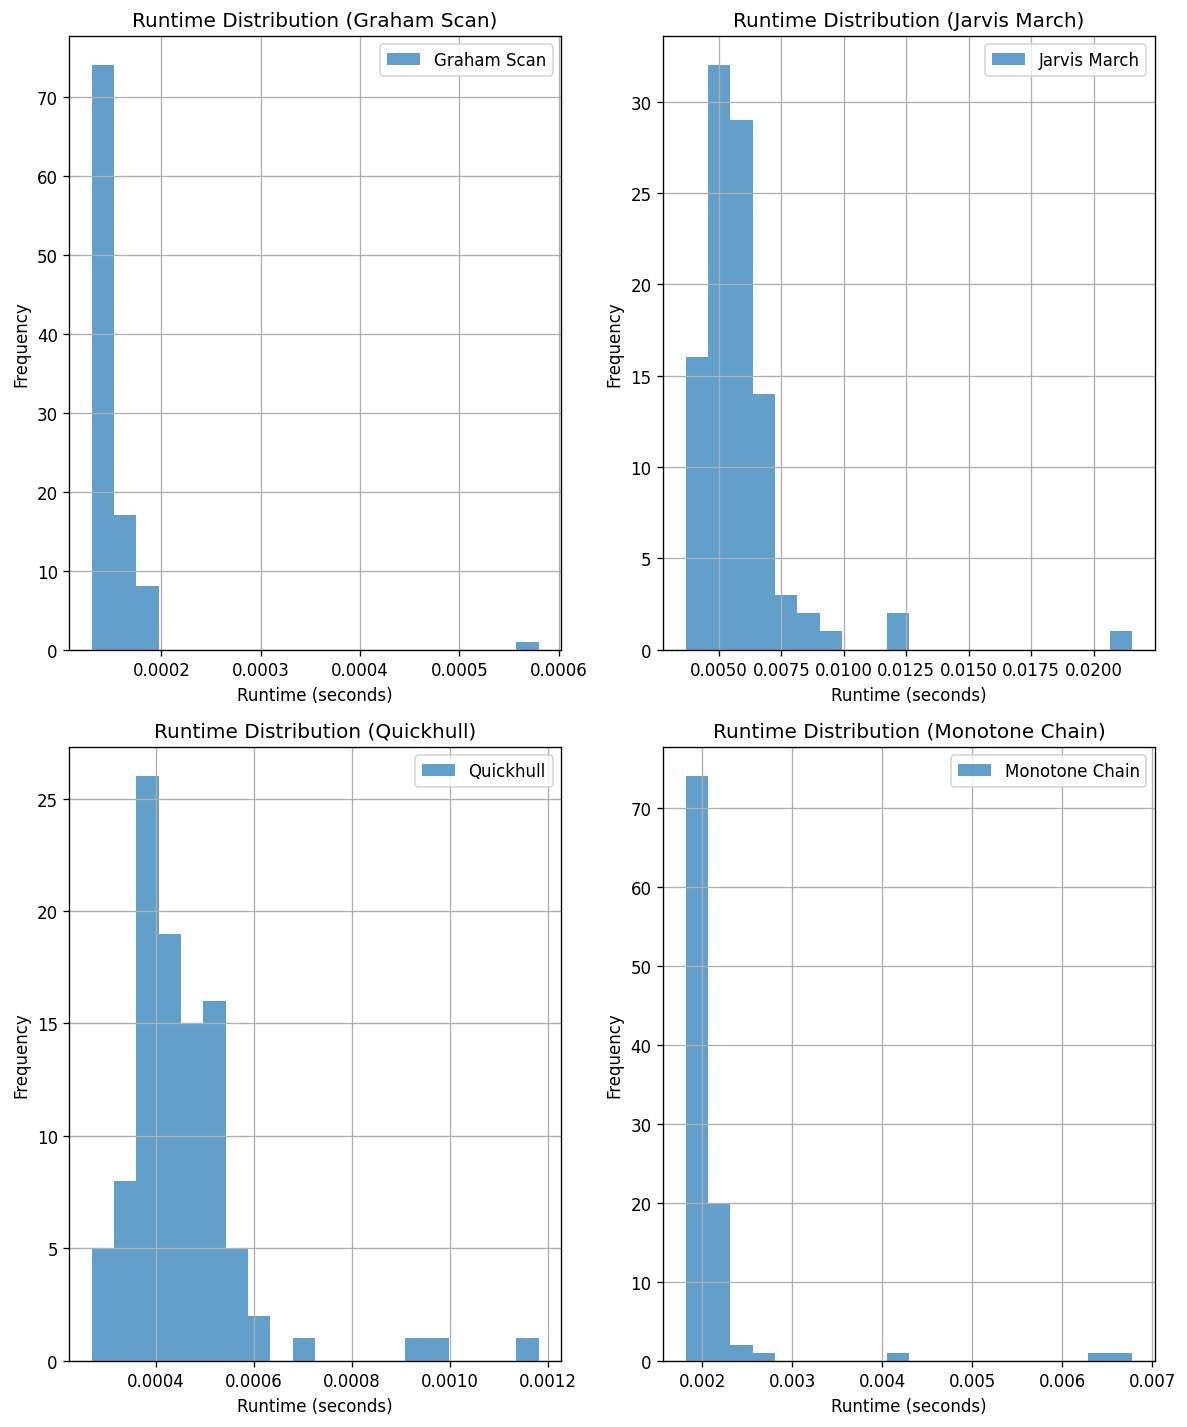

In [12]:
def runtime_distribution(n, num_samples=100, seed=42):
    np.random.seed(seed)  
    runtime_data = {"Graham Scan": [], "Jarvis March": [], "Quickhull": [], "Monotone Chain": []}

    for _ in range(num_samples):
        x, y = generate_point_cloud(n, distribution="uniform", bounds=(0, 1))
        runtime_data["Graham Scan"].append(measure_runtime(x, y, graham_scan))
        runtime_data["Jarvis March"].append(measure_runtime(x, y, jarvis_march))
        runtime_data["Quickhull"].append(measure_runtime(x, y, quickhull))
        runtime_data["Monotone Chain"].append(measure_runtime(x, y, monotone_chain))

    return runtime_data

runtime_data = runtime_distribution(n=50)

plt.figure(figsize=(10, 12), dpi=120)
for i, (method, times) in enumerate(runtime_data.items()):
    plt.subplot(2, 2, i + 1)
    plt.hist(times, bins=20, alpha=0.7, label=method)
    plt.xlabel("Runtime (seconds)")
    plt.ylabel("Frequency")
    plt.title(f"Runtime Distribution ({method})")
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

# Task 2

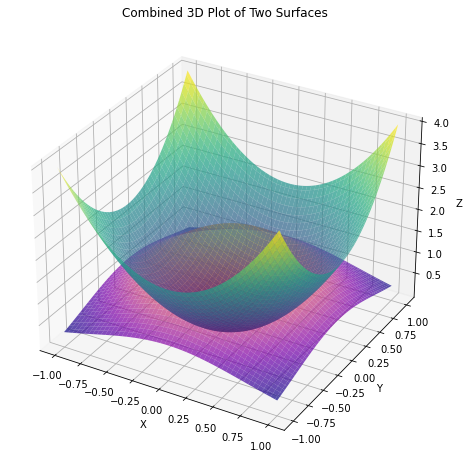

In [71]:
def surface1(x, y):
    return 2 * x**2 + 2 * y**2

def surface2(x, y):
    return 2 * np.exp(-x**2 - y**2)

x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x, y)

Z1 = surface1(X, Y)
Z2 = surface2(X, Y)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

surf1 = ax.plot_surface(X, Y, Z1, cmap='viridis', edgecolor='none', alpha=0.7, label='Surface 1')
surf2 = ax.plot_surface(X, Y, Z2, cmap='plasma', edgecolor='none', alpha=0.7, label='Surface 2')

ax.set_title('Combined 3D Plot of Two Surfaces')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Show the plot
plt.show()


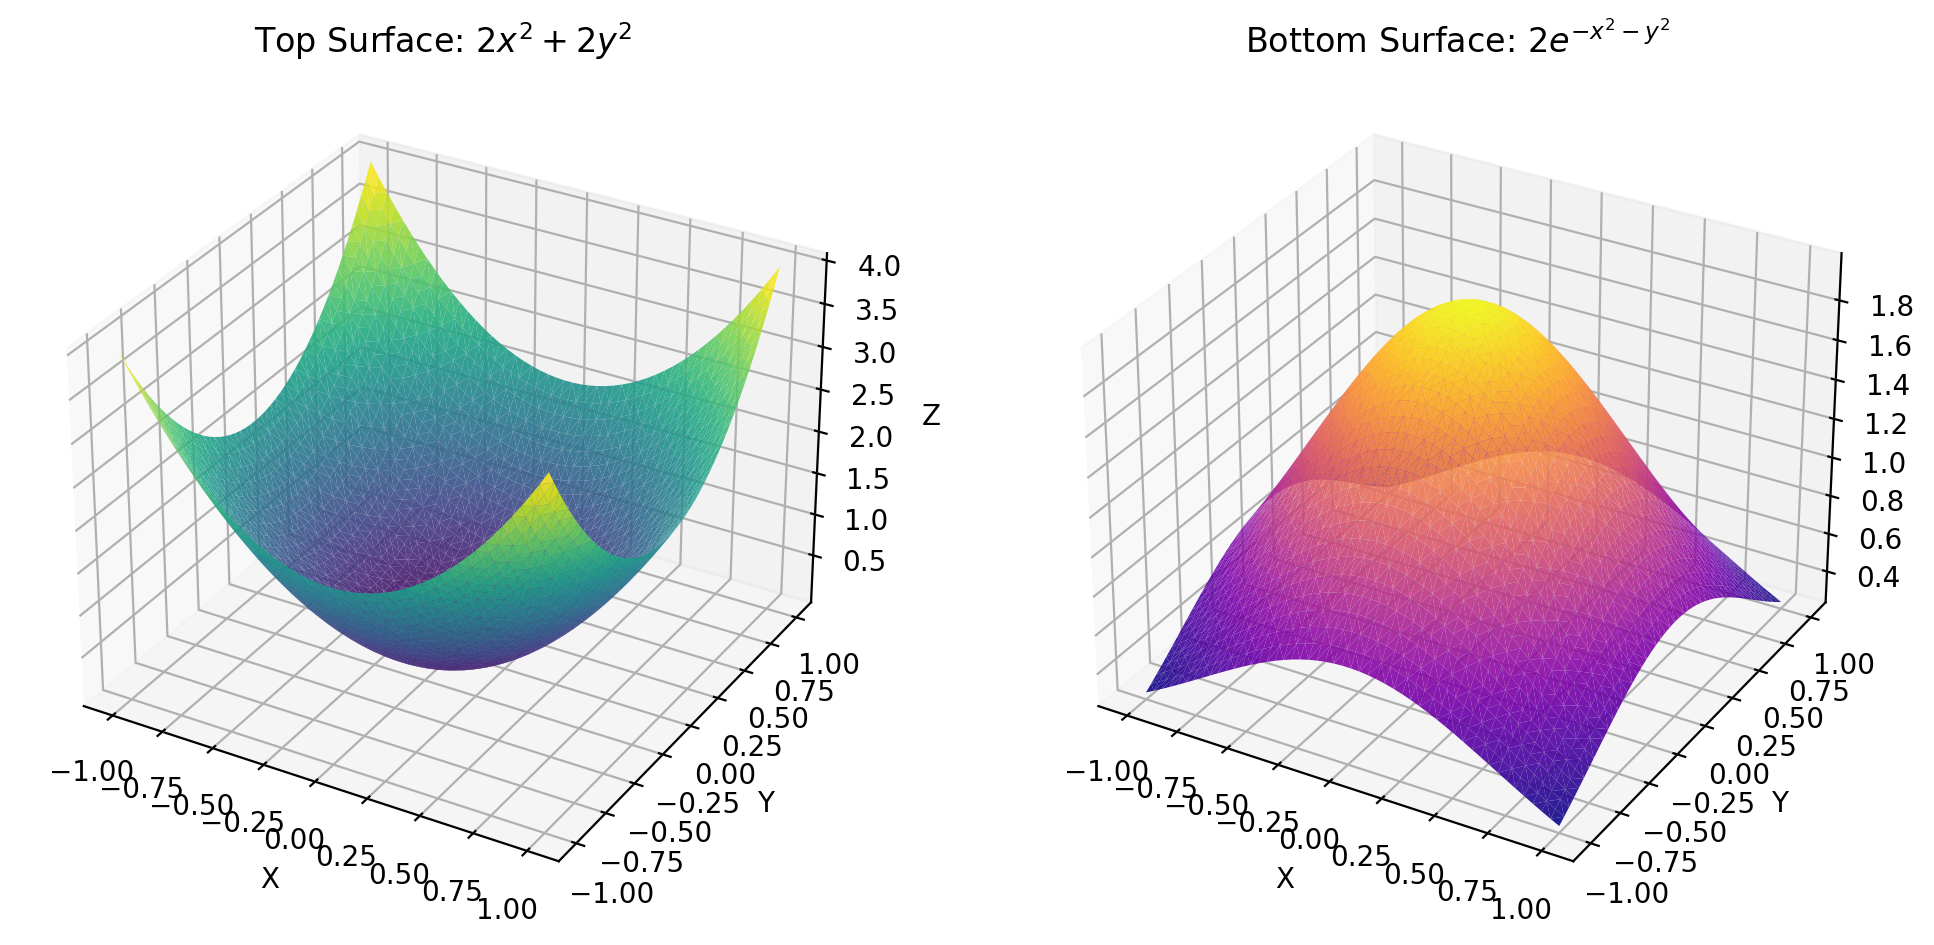

In [14]:

def surface1(x, y):
    return 2 * x**2 + 2 * y**2

def surface2(x, y):
    return 2 * np.exp(-x**2 - y**2)

x = np.linspace(-1, 1, 50)
y = np.linspace(-1, 1, 50)
X, Y = np.meshgrid(x, y)

points = np.vstack([X.ravel(), Y.ravel()]).T

Z1 = surface1(points[:, 0], points[:, 1])  # Top surface
Z2 = surface2(points[:, 0], points[:, 1])  # Bottom surface

tri = Delaunay(points)

fig = plt.figure(figsize=(12, 6),dpi=200)

ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_trisurf(points[:, 0], points[:, 1], Z1, triangles=tri.simplices, cmap='viridis', alpha=0.9)
ax1.set_title('Top Surface: $2x^2 + 2y^2$')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')

ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_trisurf(points[:, 0], points[:, 1], Z2, triangles=tri.simplices, cmap='plasma', alpha=0.9)
ax2.set_title('Bottom Surface: $2e^{-x^2 - y^2}$')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')

plt.show()


In [19]:
# I need to get the enclosed region

Average radius: 0.7576042466996087


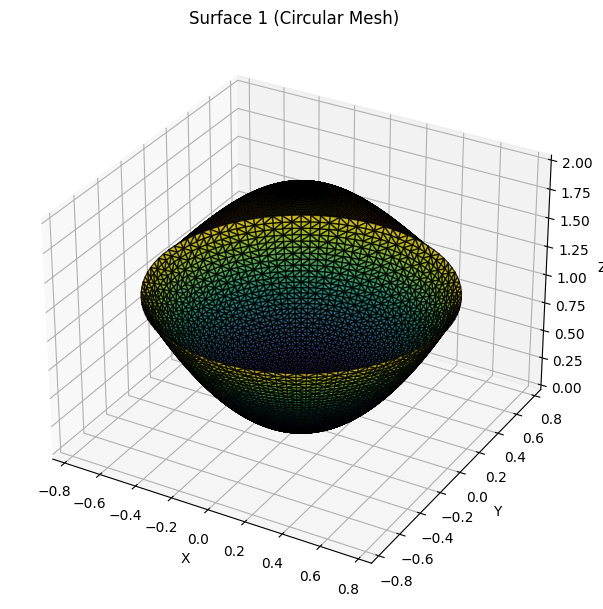

In [39]:
from scipy.ndimage import binary_fill_holes
from skimage.measure import find_contours
import numpy as np
import matplotlib.pyplot as plt

def surface1(x, y):
    return 2 * x**2 + 2 * y**2

def surface2(x, y):
    return 2 * np.exp(-x**2 - y**2)

# Create a grid for evaluation
x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x, y)

# Compute surface values
Z1 = surface1(X, Y)
Z2 = surface2(X, Y)

# Compute the difference and apply tolerance
difference = np.abs(Z1 - Z2)
tolerance = 0.01
mask = difference <= tolerance
filled_mask = binary_fill_holes(mask)

# Extract the boundary of the filled mask
contours = find_contours(filled_mask, level=0.5)  # Find boundary as a list of arrays
if len(contours) == 0:
    print("No valid contours found. Adjust tolerance or grid resolution.")
else:
    # Use the first detected boundary
    boundary = contours[0]
    boundary_coords = np.array([[x[int(p[1])], y[int(p[0])]] for p in boundary])

    # Compute average radius
    r_values = np.sqrt(boundary_coords[:, 0]**2 + boundary_coords[:, 1]**2)
    r_avg = np.mean(r_values)
    print(f"Average radius: {r_avg}")

    # Generate circular mesh within r_avg
    theta = np.linspace(0, 2 * np.pi, 100)
    r = np.linspace(0, r_avg, 50)
    R, Theta = np.meshgrid(r, theta)
    mesh_x = R * np.cos(Theta)
    mesh_y = R * np.sin(Theta)

    # Compute Z values for the mesh
    mesh_x_flat = mesh_x.ravel()
    mesh_y_flat = mesh_y.ravel()
    mesh_z1 = surface1(mesh_x_flat, mesh_y_flat)
    mesh_z2 = surface2(mesh_x_flat, mesh_y_flat)

    # Plot the surfaces
    fig = plt.figure(figsize=(12, 6))

    # Surface 1
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.plot_trisurf(mesh_x_flat, mesh_y_flat, mesh_z1, cmap='viridis', alpha=0.8, edgecolor='k')
    ax1.plot_trisurf(mesh_x_flat, mesh_y_flat, mesh_z2, cmap='plasma', alpha=0.8, edgecolor='k')

    ax1.set_title("Surface 1 (Circular Mesh)")
    ax1.set_xlabel("X")
    ax1.set_ylabel("Y")
    ax1.set_zlabel("Z")


    plt.tight_layout()
    plt.show()


In [62]:

# Generate a circular mesh within r_avg
theta = np.linspace(0, 2 * np.pi, 50)
r = np.linspace(0, r_avg, 50)
R, Theta = np.meshgrid(r, theta)
mesh_x = R * np.cos(Theta)
mesh_y = R * np.sin(Theta)

# Flatten the mesh for processing
mesh_coords = np.column_stack((mesh_x.ravel(), mesh_y.ravel()))

# Compute Z values for the circular mesh
mesh_z1 = surface1(mesh_coords[:, 0], mesh_coords[:, 1])
mesh_z2 = surface2(mesh_coords[:, 0], mesh_coords[:, 1])

# Perform Delaunay triangulation on the mesh
tri = Delaunay(mesh_coords)


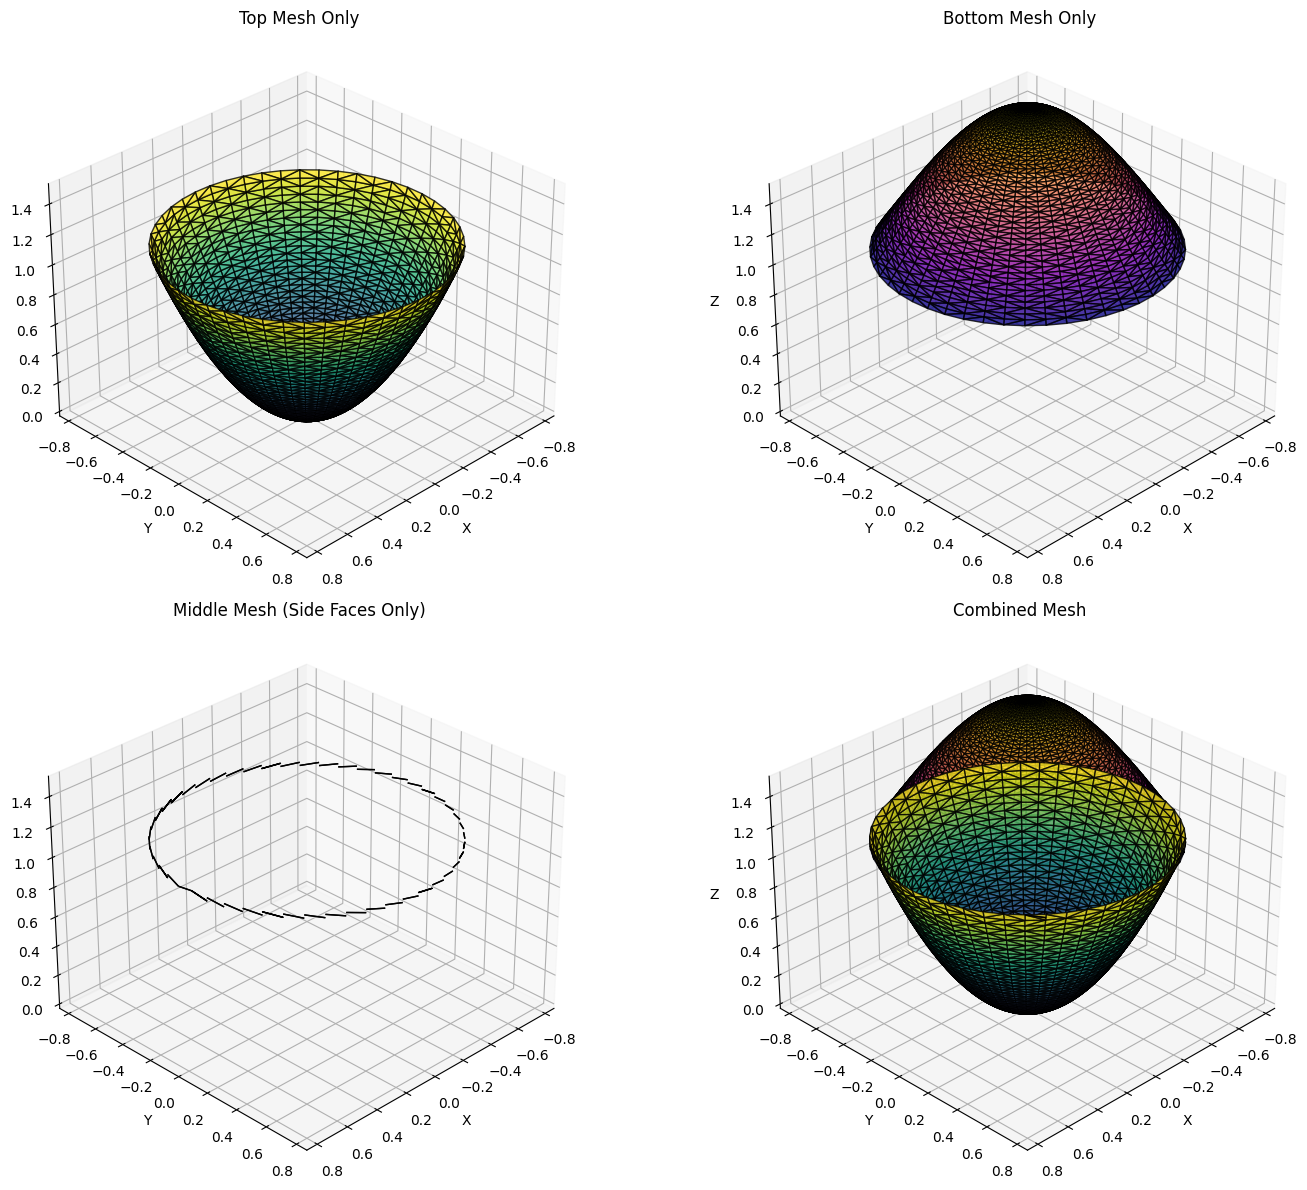

In [63]:
# Prepare for visualization
fig = plt.figure(figsize=(16, 12))

# 1. Top Mesh Only
ax1 = fig.add_subplot(221, projection='3d')
ax1.plot_trisurf(
    mesh_coords[:, 0],
    mesh_coords[:, 1],
    mesh_z1,
    triangles=tri.simplices,
    cmap="viridis",
    alpha=0.8,
    edgecolor="k"
)
ax1.set_title("Top Mesh Only")
ax1.set_xlabel("X")
ax1.set_ylabel("Y")
ax1.set_zlabel("Z")
ax1.view_init(elev=30, azim=45)
ax1.set_zlim([0, 1.5])
# 2. Bottom Mesh Only
ax2 = fig.add_subplot(222, projection='3d')
ax2.plot_trisurf(
    mesh_coords[:, 0],
    mesh_coords[:, 1],
    mesh_z2,
    triangles=tri.simplices,
    cmap="plasma",
    alpha=0.8,
    edgecolor="k"
)
ax2.set_title("Bottom Mesh Only")
ax2.set_xlabel("X")
ax2.set_ylabel("Y")
ax2.set_zlabel("Z")
ax2.view_init(elev=30, azim=45)
ax2.set_zlim([0, 1.5])
# 3. Middle Mesh Only
ax3 = fig.add_subplot(223, projection='3d')
boundary_edges = set()
for simplex in tri.simplices:
    for i in range(3):
        edge = tuple(sorted((simplex[i], simplex[(i + 1) % 3])))
        if edge in boundary_edges:
            boundary_edges.remove(edge)
        else:
            boundary_edges.add(edge)

for edge in boundary_edges:
    # Coordinates for the edge
    edge_coords = mesh_coords[np.array(edge)]
    side_x = np.repeat(edge_coords[:, 0], 2)
    side_y = np.repeat(edge_coords[:, 1], 2)
    side_z = np.concatenate([mesh_z1[np.array(edge)], mesh_z2[np.array(edge)]])
    ax3.plot_trisurf(
        side_x, side_y, side_z,
        triangles=[[0, 1, 2], [2, 3, 0]],  # Two triangles per edge
        color="gray", edgecolor="k", alpha=0.1
    )
ax3.set_title("Middle Mesh (Side Faces Only)")
ax3.set_xlabel("X")
ax3.set_ylabel("Y")
ax3.set_zlabel("Z")
ax3.view_init(elev=30, azim=45)
ax3.set_zlim([0, 1.5])
# 4. Combined Mesh
ax4 = fig.add_subplot(224, projection='3d')
# Top surface
ax4.plot_trisurf(
    mesh_coords[:, 0],
    mesh_coords[:, 1],
    mesh_z1,
    triangles=tri.simplices,
    cmap="viridis",
    alpha=0.8,
    edgecolor="k"
)
# Bottom surface
ax4.plot_trisurf(
    mesh_coords[:, 0],
    mesh_coords[:, 1],
    mesh_z2,
    triangles=tri.simplices,
    cmap="plasma",
    alpha=0.8,
    edgecolor="k"
)
# Side faces
for edge in boundary_edges:
    # Coordinates for the edge
    edge_coords = mesh_coords[np.array(edge)]
    side_x = np.repeat(edge_coords[:, 0], 2)
    side_y = np.repeat(edge_coords[:, 1], 2)
    side_z = np.concatenate([mesh_z1[np.array(edge)], mesh_z2[np.array(edge)]])
    ax4.plot_trisurf(
        side_x, side_y, side_z,
        triangles=[[0, 1, 2], [2, 3, 0]],  # Two triangles per edge
        color="gray", edgecolor="k", alpha=0.1
    )
ax4.set_title("Combined Mesh")
ax4.set_xlabel("X")
ax4.set_ylabel("Y")
ax4.set_zlabel("Z")
ax4.view_init(elev=30, azim=45)
ax4.set_zlim([0, 1.5])
plt.tight_layout()
plt.show()


# Digit Conversion

In [64]:
def dec_hex(x):
    temp = x
    temp2 = 0
    result = []
    hex_digits = "0123456789ABCDEF"
    while temp>0:
       temp2 =  temp % 16
       result.append(hex_digits[temp2])
       temp = temp-temp2
       temp = int(temp/16)
    result.reverse()
    hex_value = ''.join(result)
    print(hex_value)
    return hex_value
def dec_bi(x):
    temp = x
    temp2 = 0
    result = []
    hex_digits = "01"
    while temp>0:
       temp2 =  temp % 2
       result.append(hex_digits[temp2])
       temp = temp-temp2
       temp = int(temp/2)
    result.reverse()
    bi_value = ''.join(result)
    print(bi_value)
    return bi_value

In [65]:
dec_hex(1923)
dec_bi(1923)

783
11110000011


'11110000011'

In [ ]:
#!/bin/bash

# Function to convert decimal to hexadecimal
dec_to_hex() {
    local temp=$1
    local temp2=0
    local result=()
    local hex_digits="0123456789ABCDEF"

    while [ $temp -gt 0 ]; do
        temp2=$((temp % 16))  # Calculate remainder
        result+=("${hex_digits:temp2:1}")  # Add corresponding hex digit
        temp=$((temp - temp2))  # Reduce the number
        temp=$((temp / 16))  # Divide by 16
    done

    # Reverse the result array and concatenate
    local hex_value=""
    for ((i=${#result[@]}-1; i>=0; i--)); do
        hex_value+="${result[i]}"
    done

    # If the number is 0, output "0"
    if [ -z "$hex_value" ]; then
        hex_value="0"
    fi

    echo "$hex_value"
    return 0
}

# Function to convert decimal to binary
dec_to_bin() {
    local temp=$1
    local temp2=0
    local result=()
    local bin_digits="01"

    while [ $temp -gt 0 ]; do
        temp2=$((temp % 2))  # Calculate remainder
        result+=("${bin_digits:temp2:1}")  # Add corresponding binary digit
        temp=$((temp - temp2))  # Reduce the number
        temp=$((temp / 2))  # Divide by 2
    done

    # Reverse the result array and concatenate
    local bin_value=""
    for ((i=${#result[@]}-1; i>=0; i--)); do
        bin_value+="${result[i]}"
    done

    # If the number is 0, output "0"
    if [ -z "$bin_value" ]; then
        bin_value="0"
    fi

    echo "$bin_value"
    return 0
}

# Main script execution
echo "Enter a decimal number:"
read number

if ! [[ $number =~ ^[0-9]+$ ]]; then
    echo "Error: Please enter a valid non-negative integer."
    exit 1
fi

# Print results
echo -n "Hexadecimal: "
dec_to_hex $number

echo -n "Binary: "
dec_to_bin $number
